# STA 141B Assignment 5

Due __Mar 4, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice accessing and analyzing data in a database.

__For full credit, do most of your work in SQL.__ Subsetting, sorting, grouping, aggregation, and merging can all be done in SQL. It is okay to use Python code for parts of your analysis that are difficult or impossible to do in SQL, such as creating visualizations or computing statistics (other than the mean).

## Lahman's Baseball Database

In this assignment, you'll use SQL queries and __pandas__ to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2018, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

You can download the database in SQLite format [HERE](https://anson.ucdavis.edu/~nulle/baseball.sqlite).

Documentation for the database, including a description of all tables, is in the `README.md` file included in this repository.

__Exercise 1.1.__ 

1. From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

2. Is there any general trend in payrolls over this time period?

3. There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

4. How do the top 5 teams compare to other teams?

### From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
db = sql.connect("baseball.sqlite")

#### 1) From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

In [3]:
pd.read_sql('''
    SELECT MAX(total_payroll) AS total_payroll,yearid,name FROM
        (SELECT SUM(salary) AS total_payroll,name, teamid, yearid FROM 
            (SELECT * FROM 
            salaries  
            LEFT JOIN
            teams
            ON salaries.teamid = teams.teamid and salaries.yearid = teams.yearid)
        WHERE
        yearid >= 2006 AND yearid <= 2016
        GROUP BY 
        yearid, teamid
        ORDER BY 
        total_payroll DESC)
    GROUP BY
    teamid
    ORDER BY
    total_payroll DESC
    LIMIT 5
''', db)

,total_payroll,yearid,name
0,231978886,2013,New York Yankees
1,223362196,2013,Los Angeles Dodgers
2,194876481,2016,Detroit Tigers
3,188545761,2016,Boston Red Sox
4,180944967,2014,Philadelphia Phillies


From this we can see that the five teams with the highest payrolls from 2006 to 2016 were: <br>
1) 2013 New York yankees <br>
2) 2013 Los Angeles Dodgers <br>
3) 2016 Detroit Tigers <br>
4) 2016 Boston Red Sox <br>
5) 2014 Philadelphia Phillies <br>

#### 2) Is there any general trend in payrolls over this time period?

In [4]:
top5_yearly_payrolls = pd.read_sql('''
    SELECT * FROM
        (SELECT SUM(salary) AS total_payroll,name, teamid, yearid FROM 
                    (SELECT * FROM 
                    salaries  
                    LEFT JOIN
                    teams
                    ON salaries.teamid = teams.teamid AND salaries.yearid = teams.yearid)
                WHERE
                yearid >= 2006
                GROUP BY 
                yearid, teamid)
    WHERE
    name IN ("New York Yankees", "Los Angeles Dodgers", "Detroit Tigers", "Boston Red Sox", "Philadelphia Phillies")
    ORDER BY
    yearid ASC
''', db)

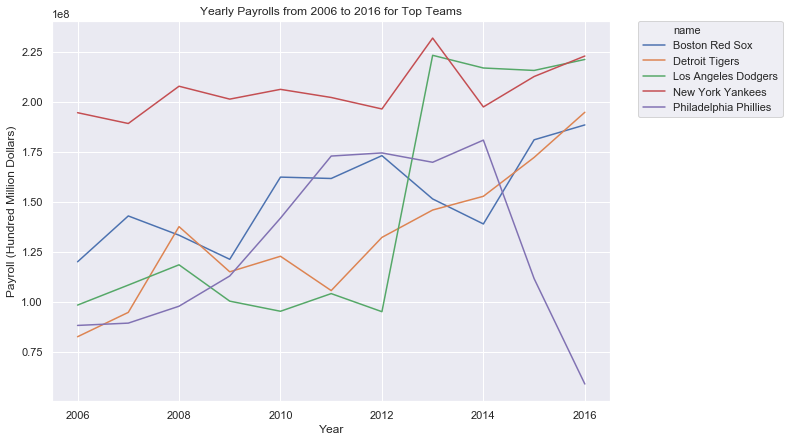

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.__version__

sns.set(style="darkgrid")
plt.figure(figsize = (10,7))
ax = sns.lineplot("yearid", "total_payroll", hue = "name", data = top5_yearly_payrolls)
ax.set_title('Yearly Payrolls from 2006 to 2016 for Top Teams')
ax.set_xlabel('Year')
ax.set_ylabel('Payroll (Hundred Million Dollars)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax

Over this time period, it appears that the five teams ten to carry similar payrolls from one year to the next. However, if we take a closer look we can see two anomalies: the Los Angeles Dodgers have a significant increase in payroll from 2012 to 2013 and the Philadelpiha Phillies having a significant decrease in payroll from 2014 to 2015 and onto 2016.

#### 3) There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

### Los Angeles Dodgers Payroll Increase from 2012 to 2013

In 2012 the Los Angeles Dodgers traded for Adrian Gonzalez and Carl Crawford in 2012 (with contracts paying them about 20 million a year), two players that were very good players with expensive contracts. These players salaries did not take into effect until 2013, which contributed to the signifcant salary spike from 2012 to 2013. Furthermore, if we look at other players with high salaries in 2013 on the Dodgers, we see two other players Zack Greinke (17 million) and Matt Kemp (20 million). Greinke was signed as a free agent, and Kemp was already on the team but by the structure of his contract he was making twice as much as he did in 2012 (10 million). Prior to 2013 the Dodgers did not have one player with a salary over 15 million, but in 2013 they had 7 where the top 4 salaries were Gonzalez, Crawford, Kemp, and Greinke.


***Sources***
- 2013 payrolls: <https://www.spotrac.com/mlb/los-angeles-dodgers/payroll/2013/>
- 2012 payrolls: <https://www.spotrac.com/mlb/los-angeles-dodgers/payroll/2012/>
- Crawford and Gonzalez traded to team <https://en.wikipedia.org/wiki/Adri%C3%A1n_Gonz%C3%A1lez>
- Zack Greinke joins team in 2013 <https://en.wikipedia.org/wiki/Zack_Greinke>
- Carl Crawford join team in 2013 <https://en.wikipedia.org/wiki/Carl_Crawford>

### Philadelphia Phillies Payroll Decrease from 2014 through 2016

**2014-2015** <br>
The significant decrease in the Philadelphia Phillies Payroll after 2014, begins with the the leave of 4 of the top five highest paid players in from 2014 to 2015. These players were Cole hamels (22.5 million), Chase Utley (15 million), Jonathan Papelbon (13 million), and Jimmy Rollins (11 million). During the season of 2015, the second highest player, Carlos Ruiz, was only making (8.5 million).

**2015-2016** <br>
The total payroll continued to decrease because a year later, the second and third highest paid players, Carlos Ruiz and Aaron Harang on the team were no longer on the team. Therefore, causing the total payroll to continue to plummet.

**Sources**
- 2016 payrolls :https://www.spotrac.com/mlb/philadelphia-phillies/payroll/2016/
- 2015 payrolls :https://www.spotrac.com/mlb/philadelphia-phillies/payroll/2015/
- 2014 payrolls :https://www.spotrac.com/mlb/philadelphia-phillies/payroll/2014/


#### 4) How do the top 5 teams compare to other teams?

In [6]:
nottop5_yearly_payrolls = pd.read_sql('''
    SELECT AVG(total_payroll) as total_payroll,yearid FROM
        (SELECT SUM(salary) AS total_payroll,name, teamid, yearid FROM 
                    (SELECT * FROM 
                    salaries  
                    LEFT JOIN
                    teams
                    ON salaries.teamid = teams.teamid and salaries.yearid = teams.yearid)
                WHERE
                yearid >= 2006 AND yearid <= 2016
                GROUP BY 
                yearid, teamid)
    WHERE
    name NOT IN ("New York Yankees", "Los Angeles Dodgers", "Detroit Tigets", "Boston Red Sox", "Philadelphia Phillies")
    GROUP BY
    yearid
    ORDER BY
    yearid ASC
''', db)

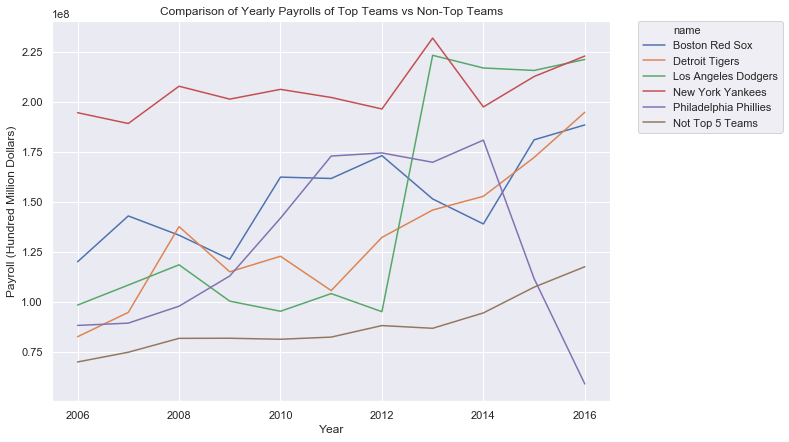

In [7]:
nottop5_yearly_payrolls["name"] = "Not Top 5 Teams"
all_yearly_payrolls = pd.concat([top5_yearly_payrolls, nottop5_yearly_payrolls], sort = False)

sns.set(style="darkgrid")
plt.figure(figsize = (10,7))
ax = sns.lineplot("yearid", "total_payroll", hue = "name", data = all_yearly_payrolls)
ax.set_title('Comparison of Yearly Payrolls of Top Teams vs Non-Top Teams')
ax.set_xlabel('Year')
ax.set_ylabel('Payroll (Hundred Million Dollars)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax

To compare the top five teams to the other teams, we will take the average payroll of all the other teams and observe how it changes over the years. Although the other non top five teams tend to have a lower payroll compared to the top five teams, it is the non top five teams that are consistently increasing their pay rolls on average compared to the top five teams.

__Exercise 1.2.__ Ask and use the database to answer 3 questions about baseball. For each question, write at least 2-3 paragraphs (~150 words) and support your answer with plots. If you feel like you don't have enough to write for a question, you probably aren't investigating follow up questions (inspired your original question) as carefully as you should.

__Try to come up with your own questions__, but here are two examples of reasonable questions:

* Is it common for players to switch teams? Has this changed over time? Which players have been on the most teams, and how many were they on?
* How much have salaries increased over the years in [real dollars](https://en.wikipedia.org/wiki/Real_versus_nominal_value_(economics))? The `salary` column in the `Salaries` table is in nominal dollars, so you will need to get Consumer Price Index data online if you want to answer this question. Is there a corresponding increase in performance?

Please make sure to clearly state each of your questions in your submission.

# Question 1: What is the fan attendance of the top (5) teams in 2000? Of these teams which team has the most loyal fan base? Was there a correspondence between wins and attendance over the follow seasons?

In [8]:
# find teams with highest attendance in 2000
pd.read_sql('''
    SELECT year_key as year, name as team, attendance, park FROM
        (SELECT * FROM homegames
        LEFT JOIN
        teams
        on homegames.team_key = teams.teamid AND homegames.year_key = teams.yearid)
    WHERE
    year_key = 2000
    ORDER BY
    attendance DESC
    LIMIT 5
''', db)

,year,team,attendance,park
0,2000,Cleveland Indians,3456278,Jacobs Field
1,2000,St. Louis Cardinals,3336493,Busch Stadium II
2,2000,San Francisco Giants,3315330,PacBell Park
3,2000,Baltimore Orioles,3297031,Oriole Park at Camden Yards
4,2000,Colorado Rockies,3295129,Coors Field


In [9]:
# attendance over the years for each of the 5 teams
attendance = pd.read_sql('''
    SELECT year_key as year, name as team, attendance, park FROM
        (SELECT * FROM homegames
        LEFT JOIN
        teams
        on homegames.team_key = teams.teamid AND homegames.year_key = teams.yearid)
    WHERE
    year >= 2000 and year <= 2010 AND team IN ("Cleveland Indians", "St. Louis Cardinals", "San Francisco Giants", "Baltimore Orioles", "Colorado Rockies")
    ORDER BY
    team ASC
''', db)

# team wins and attendance
team_wins = pd.read_sql('''
    SELECT year_key AS year, name, attendance, w as wins FROM
        (SELECT *, MAX(attendance) FROM
            (SELECT * FROM homegames
            LEFT JOIN
            teams
            on homegames.team_key = teams.teamid AND homegames.year_key = teams.yearid)
        GROUP BY
        name, year_key)
    WHERE
    year >= 2000  AND year <= 2010 AND name IN ("Cleveland Indians", "St. Louis Cardinals", "San Francisco Giants", "Baltimore Orioles", "Colorado Rockies")
    
''', db)

In [10]:
attendance

,year,team,attendance,park
0,2000,Baltimore Orioles,3297031,Oriole Park at Camden Yards
1,2001,Baltimore Orioles,3094841,Oriole Park at Camden Yards
2,2002,Baltimore Orioles,2681439,Oriole Park at Camden Yards
3,2003,Baltimore Orioles,2454523,Oriole Park at Camden Yards
4,2004,Baltimore Orioles,2744013,Oriole Park at Camden Yards
5,2005,Baltimore Orioles,2624804,Oriole Park at Camden Yards
6,2006,Baltimore Orioles,2153150,Oriole Park at Camden Yards
7,2007,Baltimore Orioles,2172487,Oriole Park at Camden Yards
8,2008,Baltimore Orioles,1950075,Oriole Park at Camden Yards
9,2009,Baltimore Orioles,1907163,Oriole Park at Camden Yards


In [11]:
team_wins

,year,name,attendance,wins
0,2000,Baltimore Orioles,3297031,74
1,2001,Baltimore Orioles,3094841,63
2,2002,Baltimore Orioles,2681439,67
3,2003,Baltimore Orioles,2454523,71
4,2004,Baltimore Orioles,2744013,78
5,2005,Baltimore Orioles,2624804,74
6,2006,Baltimore Orioles,2153150,70
7,2007,Baltimore Orioles,2172487,69
8,2008,Baltimore Orioles,1950075,68
9,2009,Baltimore Orioles,1907163,64


C:\Users\Jonathan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


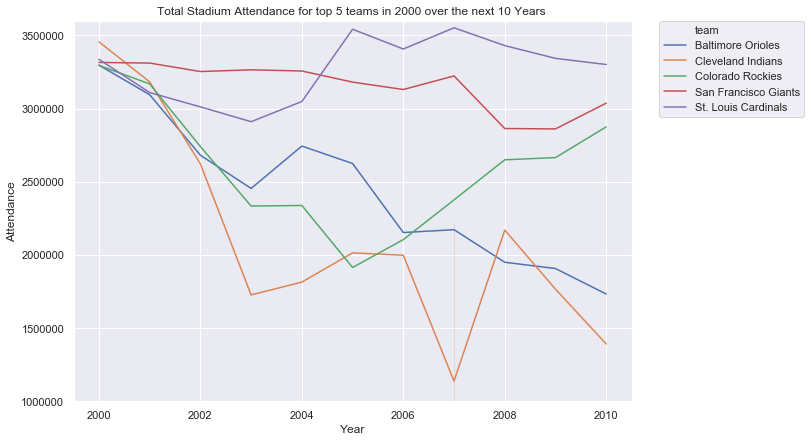

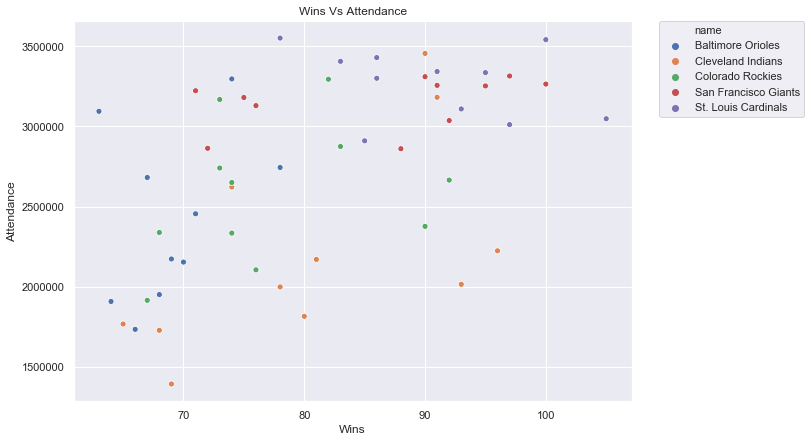

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize = (10,7))
ax = sns.lineplot("year", "attendance",hue = "team", data = attendance)
ax.set_title('Total Stadium Attendance for top 5 teams in 2000 over the next 10 Years ')
ax.set_xlabel('Year')
ax.set_ylabel('Attendance')
ax.set(ylim = (1000000,3600000))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax

sns.set(style="darkgrid")
plt.figure(figsize = (10,7))
ax2 = sns.scatterplot("wins", "attendance", hue = "name", data = team_wins)
ax2.set_title('Wins Vs Attendance')
ax2.set_xlabel('Wins')
ax2.set_ylabel('Attendance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2

# move legend <https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot>

#### What is the fan attendance of the top (5) teams in 2000? Of these teams which team has the most loyal fan base?

The teams that had the highest fan attenance in 2000 were the Cleveland Indians, St. Louis Cardinals, San Francisco Giants, Baltimore Orioles, and the Colorado Rockies, all of whom had a total fan attendance over 3 million over the entire season. To measure fan loyalty we will observe how the the fan attendance changed over the following seasons. When looking how the attendance changed over the following seasons for these respective teams, we see that the Cleveland Indians, Colorado Rockies, and Baltimore Orioles suffered significant fan losses. It appears that the Orioles have the least loyal fans since in 2007 the fan attendance reaches a staggering low point of almost 1 million fans for the entire season. Although the for Colorado Rockies the fans did not remain loyal over the years indicated by the lowering attendance rates from 2000 to 2005, it is optimistic to see that fans are coming back to attend the games and the attendance rates have continued to increase since. The two most loyal fan bases are the San Francisco Giants' and te St. Louis Cardinals' fans. The fan attendance over the following years was consistently at or around 3 million attendees.

#### Was there a correspondence between wins and attendance over the follow seasons?

Furthermore, it seems that the higher number a wins a team achieves in the season, there is a higher number of fans that attend the games. As the number of wins increases the total number of fans that attended the games for a team that season increase. This is an indication that wins and attendance are correlated with one another.

# Question 2: Which two teams achieved the most wins with a low budget(payroll) in 2002? Did these two teams that found success with low payrolls continue with this budget-strategy the following years? How did their success turn out over the following years?

In [13]:
# identify most successful teams of those with a low payroll
pd.read_sql('''
    SELECT total_payroll,yearid,name, wins FROM
        (SELECT SUM(salary) AS total_payroll,name, teamid, yearid, w as wins FROM
            (SELECT * FROM 
            salaries  
            LEFT JOIN
            teams
            ON salaries.teamid = teams.teamid and salaries.yearid = teams.yearid) as l     
        WHERE
        yearid == 2002
        GROUP BY 
        yearid, teamid)
    GROUP BY
    teamid
    ORDER BY
    total_payroll ASC
    LIMIT 10
''', db)

,total_payroll,yearid,name,wins
0,34380000,2002,Tampa Bay Devil Rays,55
1,38670500,2002,Montreal Expos,83
2,40004167,2002,Oakland Athletics,103
3,40425000,2002,Minnesota Twins,94
4,41425000,2002,San Diego Padres,66
5,41979917,2002,Florida Marlins,79
6,42323599,2002,Pittsburgh Pirates,72
7,45050390,2002,Cincinnati Reds,78
8,47257000,2002,Kansas City Royals,62
9,50287833,2002,Milwaukee Brewers,56


In [14]:
# budget teams
budget_teams = pd.read_sql('''
        SELECT SUM(salary) AS total_payroll,name, teamid, yearid as year, w as wins FROM
            (SELECT * FROM 
            salaries  
            LEFT JOIN
            teams
            ON salaries.teamid = teams.teamid and salaries.yearid = teams.yearid) as l     
        WHERE
        yearid >= 2002 AND name IN ("Oakland Athletics", "Minnesota Twins")
        GROUP BY 
        yearid, teamid
        ORDER BY
        name
''', db)
budget_teams

,total_payroll,name,teamID,year,wins
0,40425000,Minnesota Twins,MIN,2002,94
1,55505000,Minnesota Twins,MIN,2003,90
2,53585000,Minnesota Twins,MIN,2004,92
3,56186000,Minnesota Twins,MIN,2005,83
4,63396006,Minnesota Twins,MIN,2006,96
5,71439500,Minnesota Twins,MIN,2007,79
6,56932766,Minnesota Twins,MIN,2008,88
7,65299266,Minnesota Twins,MIN,2009,87
8,97559166,Minnesota Twins,MIN,2010,94
9,112737000,Minnesota Twins,MIN,2011,63


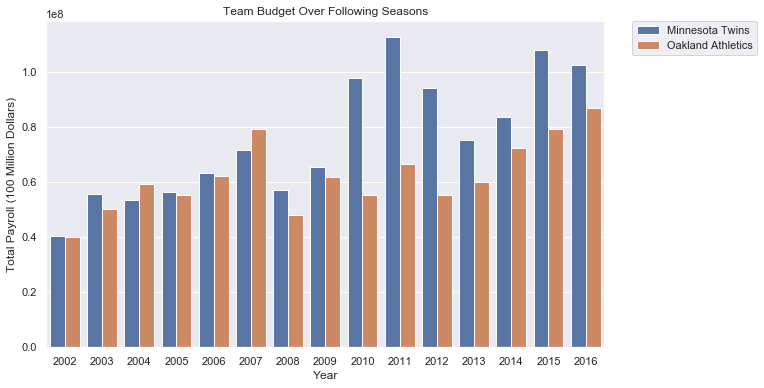

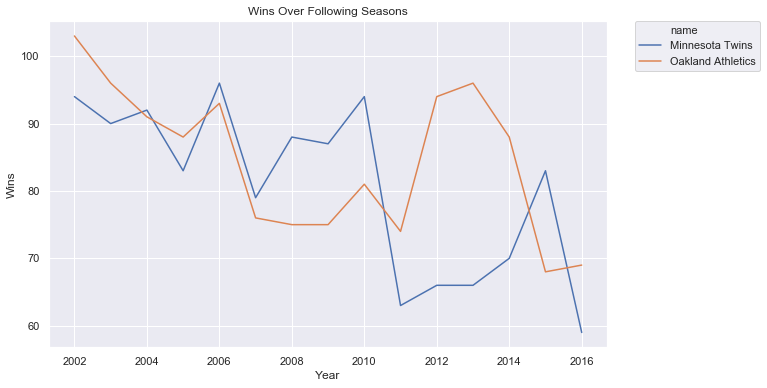

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize = (10,6))
ax = sns.barplot("year", "total_payroll",hue = "name", data = budget_teams)
ax.set_title('Team Budget Over Following Seasons')
ax.set_xlabel('Year')
ax.set_ylabel('Total Payroll (100 Million Dollars)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax

plt.figure(figsize = (10,6))
ax = sns.lineplot("year", "wins",hue = "name", data = budget_teams)
ax.set_title('Wins Over Following Seasons')
ax.set_xlabel('Year')
ax.set_ylabel('Wins')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax

#### Which two teams achieved the most wins with a low budget(payroll) in 2002?
The two teams that achieved the most wins with a low budget payroll in 2002 were the Minnesota Twins and the Oakland Athletics. Both with a budget of around 40 million dollars the season were still able to win an impressive 94 (Twins) and 103 (Athletics).

#### Did these two teams that found success with low payrolls continue with this budget-strategy the following years?
After the 2002 season the Minnesota Twins gradually increased their total payroll over the years. During the 2010 and 2013 seasons the Twins paid some of their highest player salaries, however, this did not result in more wins. Rather, during these seasons the Twins played some of their worst baseball, dropping from about 90 wins to 60 wins in one season despite having high pay rolls. Over the next years, the Twins to continued to have a higher payroll relative to the 2002 season, and seemed to obtain more wins after the big drops from 2010 to 2013, however since 2015 the teams number of wins took a big turn. Therefore, the Minneosta Twins did not continue this low budget-strategy.

####  How did their success turn out over the following years?
After the 2002 season were the Oakland Athletics won over 100 games with about a 40 million payroll, the payrolls increased the following seasons but not as much compared to the Minnesota Twins. Overall, it does seem the Athletics are still playing with a low budget/payroll strategy. Since 2002 the Athletics have not won over 100 games, but from 2012 to 2014 they found some success as they got about 90 wins for these seasons. Since then, they have not found the same sucess. In fact, they played their worst season post 2000, in 2016.

# QUESTION 3: Since 2000, does pitching performance (runs allowed) correspond to how many innings per game a player pitched? Does average number of innings pitched per game affect how many games the pitcher plays?

In [19]:
pitchers = pd.read_sql('''
    SELECT *, CAST(season_runs_allowed AS FLOAT) / season_games_played AS avg_runs_allowed_pergame FROM
        (SELECT yearid as year, playerID, g as season_games_played, ipouts / 3 AS season_innings_pitched,
        (ipouts / 3) / g AS avg_innings_pitched_pergame, r as season_runs_allowed FROM pitching
        WHERE year >= 2000)
''', db)

# convert to appropriate type
pitchers["avg_innings_pitched_pergame"] = pitchers["avg_innings_pitched_pergame"].astype(str) # categorize on this
pitchers

# convert division to float <https://stackoverflow.com/questions/8257106/divide-the-value-of-a-column-by-another-column>

,year,playerID,season_games_played,season_innings_pitched,avg_innings_pitched_pergame,season_runs_allowed,avg_runs_allowed_pergame
0,2000,abbotpa01,35,179,5,89,2.542857
1,2000,aceveju01,62,82,1,38,0.612903
2,2000,adamste01,66,84,1,42,0.636364
3,2000,aguilri01,54,47,0,28,0.518519
4,2000,aldresc01,23,20,0,14,0.608696
5,2000,alfonan01,68,70,1,35,0.514706
6,2000,almanar01,67,46,0,27,0.402985
7,2000,almanca01,62,69,1,35,0.564516
8,2000,alvarju01,11,6,0,9,0.818182
9,2000,anderbr02,33,213,6,101,3.060606


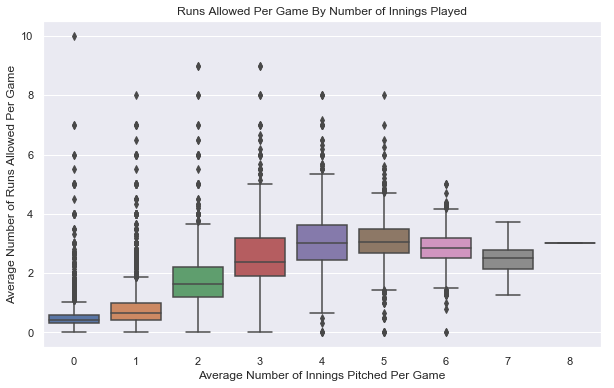

In [17]:
plt.figure(figsize = (10,6))
ax = sns.boxplot(x = "avg_innings_pitched_pergame", y = "avg_runs_allowed_pergame", data = pitchers)
ax.set_title('Runs Allowed Per Game By Number of Innings Played')
ax.set_xlabel('Average Number of Innings Pitched Per Game')
ax.set_ylabel('Average Number of Runs Allowed Per Game')
ax

Text(0.5, 1.0, 'Number of Games Pitched Grouped by Nubmer of Innings Pitched')

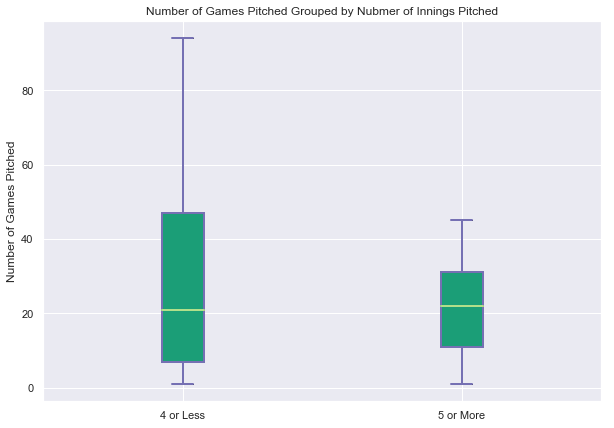

In [20]:
pitchers["avg_innings_pitched_pergame"] = pitchers["avg_innings_pitched_pergame"].astype(int)
more_innings = pitchers[pitchers["avg_innings_pitched_pergame"] >= 4] # pitchers who averaged more than 4 innings pitched
less_innings = pitchers[pitchers["avg_innings_pitched_pergame"] < 4] # pitchers who averaged less than 5 innings pitched

data_to_plot = [less_innings["season_games_played"],more_innings["season_games_played"]]
fig = plt.figure(1, figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
fig.savefig('fig1.png', bbox_inches = 'tight')
bp = ax.boxplot(data_to_plot, patch_artist = True)

for box in bp['boxes']:
    box.set( color = '#7570b3', linewidth = 2)
    box.set( facecolor = '#1b9e77' )

for whisker in bp['whiskers']:
    whisker.set(color = '#7570b3', linewidth = 2)

for cap in bp['caps']:
    cap.set(color = '#7570b3', linewidth = 2)

for median in bp['medians']:
    median.set(color = '#b2df8a', linewidth = 2)

for flier in bp['fliers']:
    flier.set(marker = 'o', color = '#e7298a', alpha = 0.5)
    
## Custom axis labels
ax.set_xticklabels(['4 or Less', "5 or More"])
ax.set_ylabel("Number of Games Pitched")
ax.set_title("Number of Games Pitched Grouped by Nubmer of Innings Pitched")

# Source : http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

#### Since 2000, does pitching performance (runs allowed) correspond to how many innings per game a player pitched?
Initially the hypothesis was that as the number of innings a pitcher plays, then the number of runs they allowed would be higher. Quite surprisingly, this trend does not hold true for all inninings. After four innings, we would expect that the number of runs allowed would go up since the pitcher is playing more innings. But pitchers who averaged five innings pitched or more actually have less number of runs allowed. Upon further research, we find out that that the "starting" pitchers play 6 or more innings, and the players who pitch this many innings are generally the better pitchers in the league. Therefore, because they are the better players they allow less runs. So the number of runs allowed given the number of innings played may be explained better that starting pitchers pitch more innings, and back up or relievers are not as good as the starters and allow more runs.

#### Does average number of innings pitched per game affect how many games the pitcher plays?
Looking at how many games are played between the pitchers who average 4 or less innings per game vs. the pitchers who average 5 or more innings per game, we can see that both groups average about the same number of games played. Upon further research, there are 162 games in an MLB season, and the starting pitchers do not play all games. The starting pitchers are part of what is called a "rotation," which allows them to only play about once every five games.

Online it stated, "Pitching staffs on MLB teams have grown from 9 or 10 to as many as 12 or 13 pitchers, due to the increased importance of relief pitching. The staff generally consists of five starting pitchers, with the remaining pitchers assigned as relievers."

From the plot we have seen that both groups average the same number of games played, which from the further research makes sense. The difference is spread can be attributed to the types of pitchers are in the group. For the pitchers who pitch  or less innings, they tend to be what is called "relief pitchers or back ups" which results in an inconsistent number of games played. While the others are starting pitchers and are consistently playing one of every five games.

**Starting Pitcher** <br>
https://en.wikipedia.org/wiki/Starting_pitcher

**Relief Pitcher** <br>
https://en.wikipedia.org/wiki/Relief_pitcher